In [1]:
import pandas as pd

## 1.pandas 数据结构

### series 用法--创建

In [3]:
obj = pd.Series([4,5,6,7])
obj

0    4
1    5
2    6
3    7
dtype: int64

In [6]:
obj = pd.Series([4,5,6,7], index = ['a','b','c','d']) #创建索引
obj.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [16]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000,'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [18]:
states = ['California', 'O', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4
# 指定index后，会自动匹配sdata中满足该index的值，匹配不上就为null

California        NaN
O                 NaN
Oregon        16000.0
Texas         71000.0
dtype: float64

In [4]:
# 取值
obj.values

array([4, 5, 6, 7])

In [5]:
#取索引
obj.index

RangeIndex(start=0, stop=4, step=1)

### series 用法--引用

In [9]:
print(obj['a'])
print(obj[['a','b','c']])
obj['a']=6
print(obj['a'])

4
a    4
b    5
c    6
dtype: int64
6


In [11]:
# 使用 NumPy 函数或类似 NumPy 的运算(如根据布尔型数组进行过滤、标量乘 法、应用数学函数等)都会保留索引值的链接
obj[obj>6] 

d    7
dtype: int64

In [12]:
obj*2

a    12
b    10
c    12
d    14
dtype: int64

In [13]:
import numpy as np
np.exp(obj)

a     403.428793
b     148.413159
c     403.428793
d    1096.633158
dtype: float64

In [19]:
# 看成定长的字典
'b' in obj

True

In [20]:
# 检测缺失数据
# pandas 的 isnull 和 notnull 函数可用于检测缺失数据
pd.isnull(obj4)

California     True
O              True
Oregon        False
Texas         False
dtype: bool

In [21]:
obj4.isnull()

California     True
O              True
Oregon        False
Texas         False
dtype: bool

In [22]:
# Series 最重要的一个功能是根据运算的索引标签自动对齐数据
obj3 + obj4

California         NaN
O                  NaN
Ohio               NaN
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [23]:
# Series 对象本身及其索引的 name 属性
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
O                 NaN
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

### DataFrame用法 -- 创建

In [24]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada',
'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [25]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [26]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop','debt'],index=['one', 'two', 'three', 'four','five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [27]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [28]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [29]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [31]:
frame2['debt'] = 16.5 # 赋一个值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [32]:
frame2['debt'] = np.arange(6.) # 赋一组值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [33]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four','five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [34]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [35]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [36]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [37]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [38]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [39]:
labels = pd.Index(np.arange(3))
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [40]:
'Ohio' in frame3.columns

True

In [41]:
pd.Index(['foo', 'foo', 'bar', 'bar'])

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

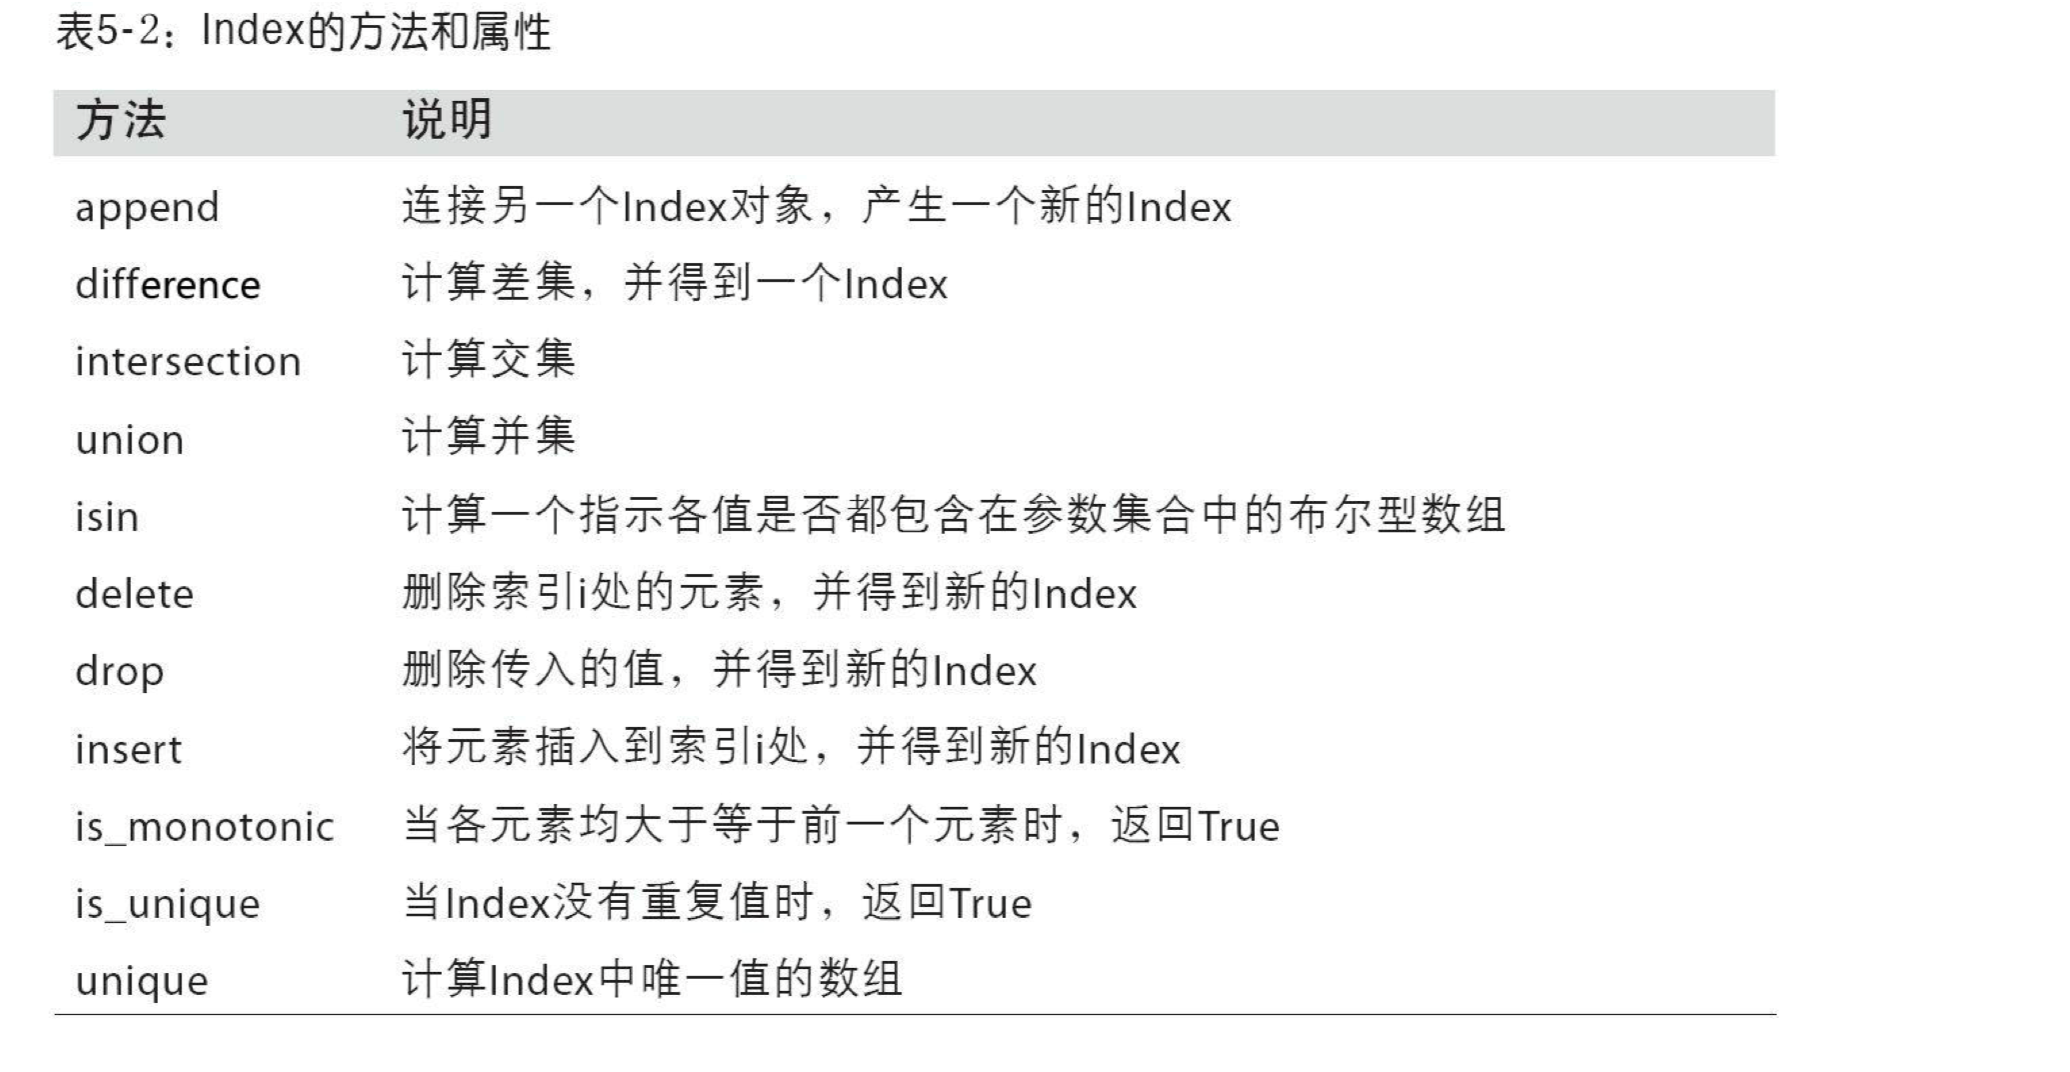

## 常用功能

In [42]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e']) # reindex
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [43]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill') #method 方法实现前向填充
obj3

0      blue
2    purple
4    yellow
dtype: object

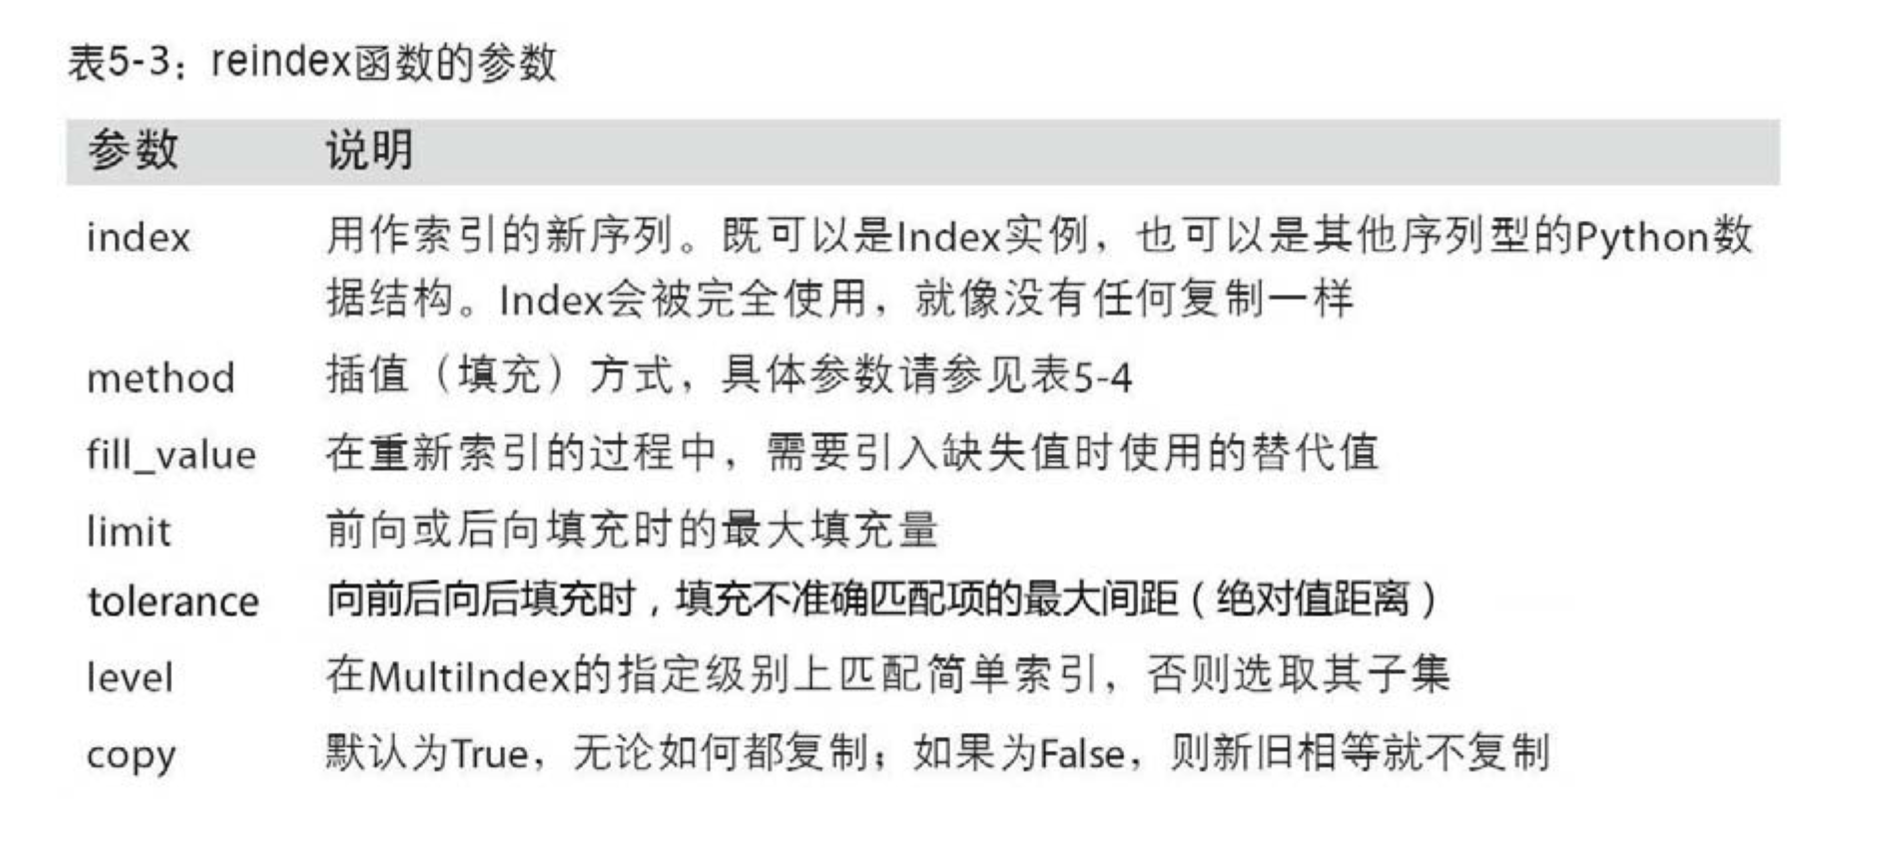

In [44]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'NewYork'], columns=['one', 'two', 'three','four'])
data.drop(['Colorado', 'Ohio']) # 默认从行标签(axis 0)删除值
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NewYork,12,13,14,15


In [45]:
data.drop('two', axis=1)
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NewYork,12,13,14,15


In [46]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
NewYork,12,14
